# Histogram equalization

1. To get $ f: D \rightarrow \left[ 0, M\right]$, simply scale the cumulativve distribution function $H_f \left( v \right)$ with the factor M. This gives: $\psi = M \cdot H_f \left( v \right)$

2. The following program  takes in a simple image and runs a histogram equalization algorithm. After this the original picture and the equalised picture are shown together with their histograms. The image is read with scipy ensuring it is read into memory as a uint8 array.

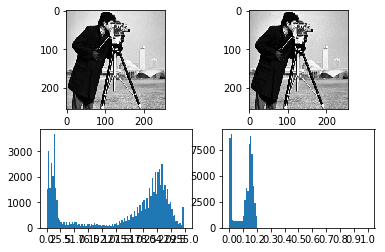

In [6]:
from numpy import histogram, interp, cumsum, diff
import scipy.ndimage as scimg
import matplotlib.pyplot as plt

BINS = 100
IM_SIZE = 255

def histogramEqualization(f, bins=BINS):
	his, be = histogram(f, range=(0,IM_SIZE), bins=bins)
	hist = his.astype(float)/sum(his)
	return interp(f, be[1:], cumsum(hist)), his, be


#Read figure and equalise
trui = scimg.imread("cameraman1.png")
trui_eq, his, be = histogramEqualization(trui)

f, axarr = plt.subplots(2, 2)

#plot histogram of original data
axarr[1, 0].bar((be[:-1] + be[1:]) / 2, his, align='center', width=diff(be))
axarr[1, 0].set_xticks([be[x] for x in range(0, len(be), int(BINS/10))])

# Show original image
axarr[0, 0].imshow(trui, cmap='gray')

#plot histogram of equalized image
his, be = histogram(trui_eq, range=(0,1), bins=BINS)
axarr[1, 1].bar((be[:-1] + be[1:]) / 2, his, align='center', width=diff(be))
axarr[1, 1].set_xticks([be[x] for x in range(0, len(be), int(BINS/10))])

# Show equalised image
axarr[0, 1].imshow(trui_eq, cmap='gray')

plt.show()


# Skin color detection

1. Plot a 3d-scatter plot of RGB values of skin and non-skin colors. Plots the points corresponding to skin color in green and the points corresponding to non-skin color in red.

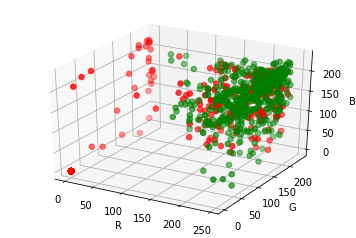

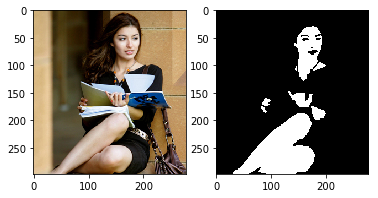

In [9]:
# Full library imports
import matplotlib.pyplot as plt
import numpy as np
import random
# Selective library imports
from scipy.ndimage import imread
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Amount of samples taken in plotting 3D scatter
SAMPLES = 500

# Randomly takes n points from a numpy array
def sample(ar, n):

	i = 0
	sample = 0
	# Create empty holder array
	samples = np.zeros(n)

	while i < len(ar) and sample < n:

		# 50% chance to select item, not critical in this
		# implementation (just used for speeding up program)
		if random.random() > .5:

			samples[sample] = ar[i]
			sample += 1

		i += 1

	return samples

#Read images
f = imread('SkinColor/FacePhoto/0520962400.jpg')
m = imread('SkinColor/GroundT_FacePhoto/0520962400.png')

# Take a selection of SAMPLES points to plot in 3D plot for
# both skin- and non-skin colors
x, y, z = np.split(skincolors, 3, 1)
x = sample(x, SAMPLES)
y = sample(y, SAMPLES)
z = sample(z, SAMPLES)

t, u, v = np.split(nonskincolors, 3, 1)
t = sample(x, SAMPLES)
u = sample(y, SAMPLES)
v = sample(z, SAMPLES)

# 3D scatter plot of randomly selected points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=30, c='green')
ax.scatter(t, u, v, s=30, c='red')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()

# Plotting image and its skin color selector
plt.subplot(121)
plt.imshow(f)

plt.subplot(122)
plt.imshow(m)

plt.show()

Train classifier for use with skin color detection